## Potential Temperature and Salinity biases

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
%matplotlib inline

### Horizontal Mean bias (w.r.t. obs) versus time

In [2]:
nr=1
nc=1
fs=(9,5.5)

#### Potential temperature

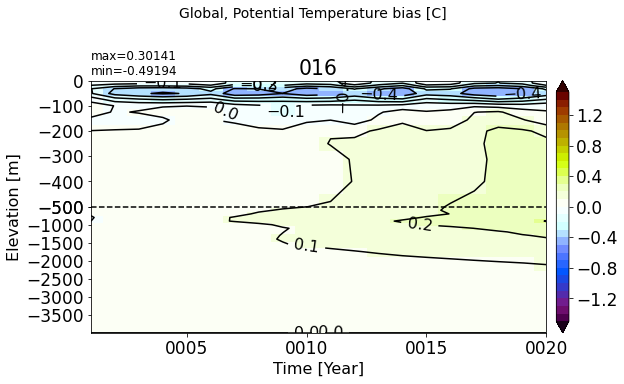

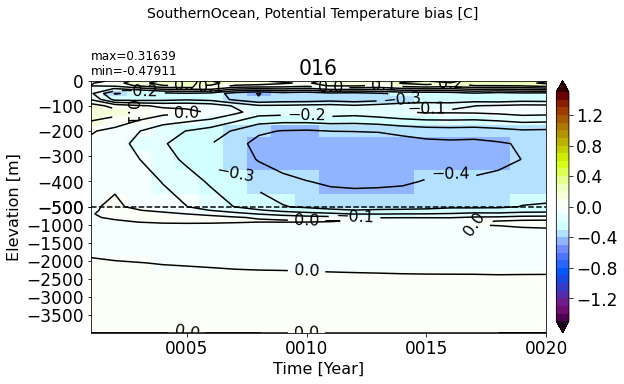

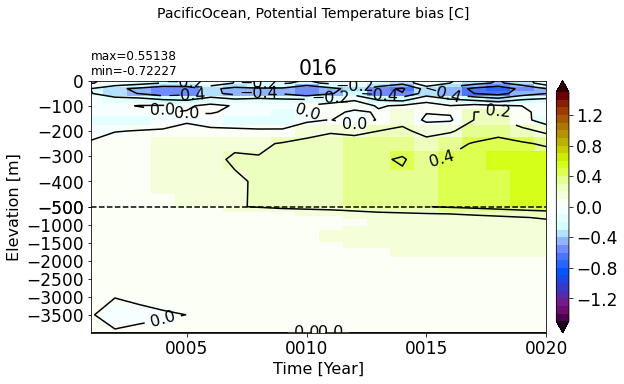

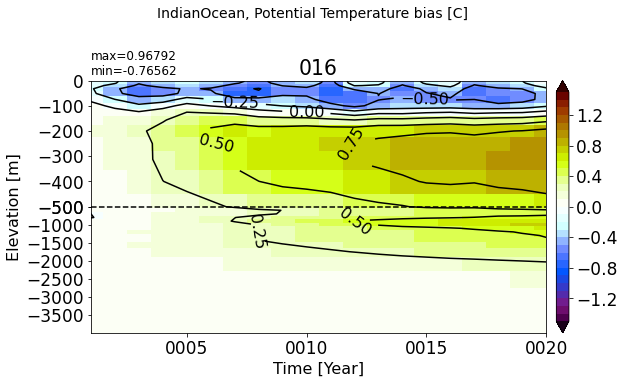

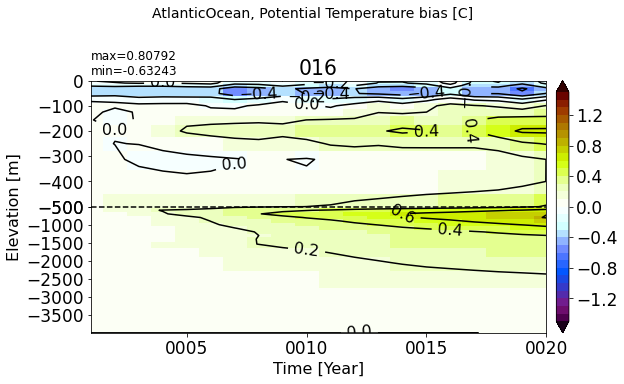

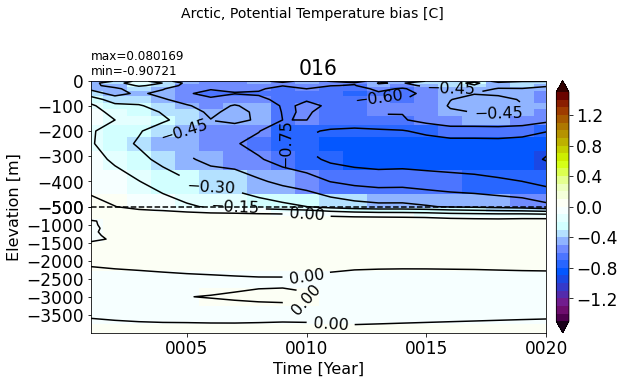

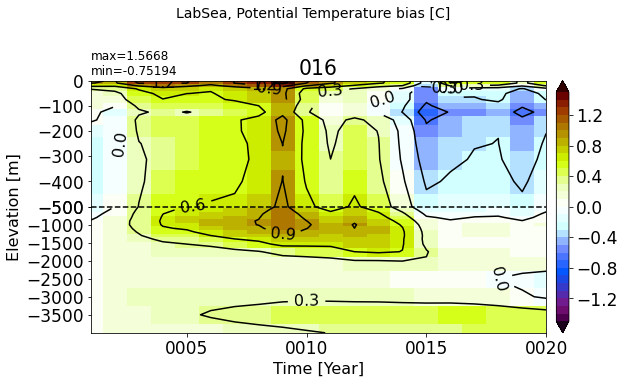

In [3]:
%matplotlib inline
reg_mom = ['Global','SouthernOcean','PacificOcean','IndianOcean','AtlanticOcean','Arctic','LabSea']
matplotlib.rcParams.update({'font.size': 17})
vmax=1.5; vmin=-vmax
for m in reg_mom:
  fig, ax = plt.subplots(nrows=nr, ncols=nc, figsize=fs, sharex=False, sharey=True)

  plt.suptitle(str(m)+', Potential Temperature bias [C]', fontsize=14)
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom = xr.open_dataset(path+case+'_thetao_drift.nc').sel(time=slice('0001-01-01', end_date))
    
    splitscale =  [0., -500., -4000]
    dummy_mom = np.ma.masked_invalid(ds_mom.sel(region=m).thetao_drift.values)
    ztplot(dummy_mom, ds_mom.time.values, ds_mom.z_l.values*-1, ignore=np.nan, splitscale=splitscale, 
           contour=True, axis=ax , title=label[i], extend='both', colormap='dunnePM', 
           autocenter=True, tunits='Year', show=False, clim=(vmin, vmax)) 
    plt.subplots_adjust(top = 0.8)
    plt.tight_layout()

#### Salinity

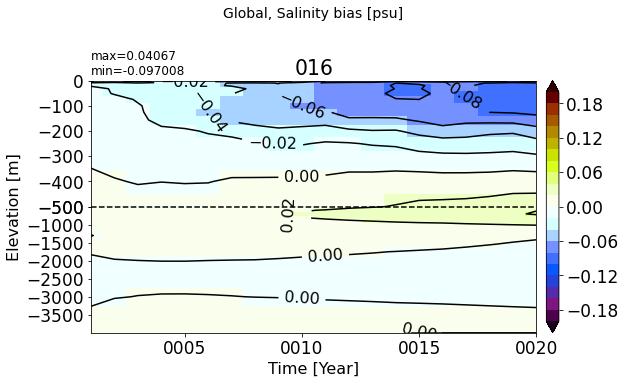

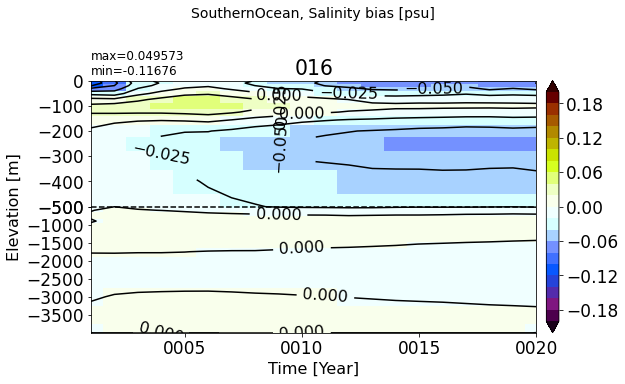

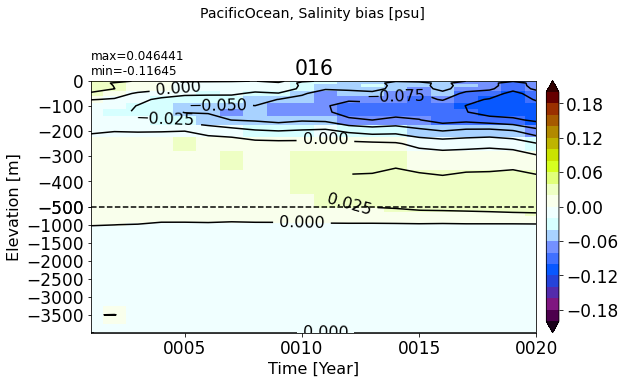

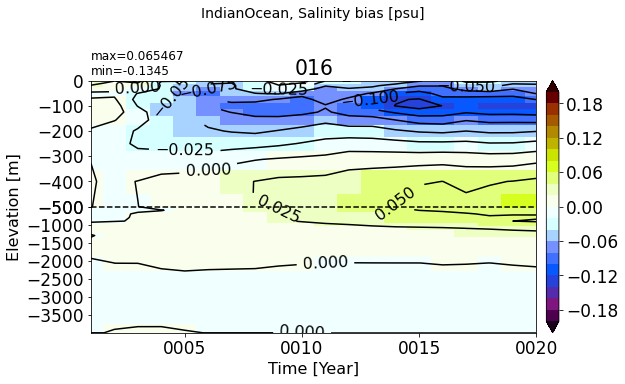

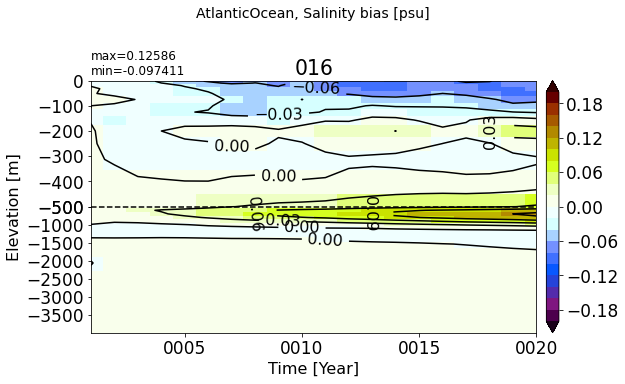

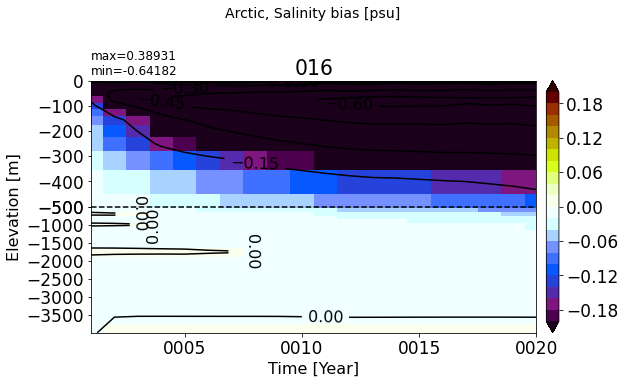

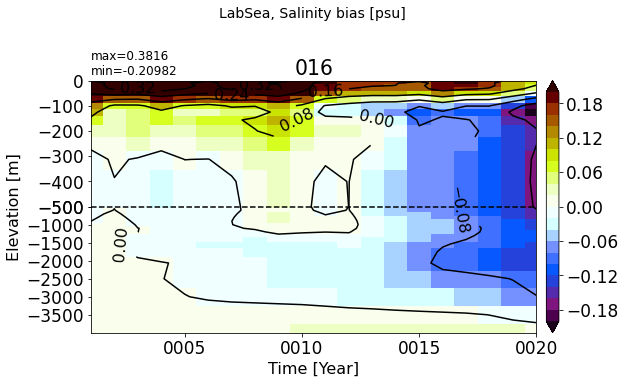

In [4]:
%matplotlib inline
reg_mom = ['Global','SouthernOcean','PacificOcean','IndianOcean','AtlanticOcean','Arctic','LabSea']
matplotlib.rcParams.update({'font.size': 17})
vmax=0.2; vmin=-vmax
for m in reg_mom:
  fig, ax = plt.subplots(nrows=nr, ncols=nc, figsize=fs, sharex=False, sharey=True)
  plt.suptitle(str(m)+', Salinity bias [psu]', fontsize=14)
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom = xr.open_dataset(path+case+'_so_drift.nc').sel(time=slice('0001-01-01', end_date))
    
    splitscale =  [0., -500., -4000]
    dummy_mom = np.ma.masked_invalid(ds_mom.sel(region=m).so_drift.values)
    ztplot(dummy_mom, ds_mom.time.values, ds_mom.z_l.values*-1, ignore=np.nan, splitscale=splitscale, 
           contour=True, axis=ax , title=label[i], extend='both', colormap='dunnePM', 
           autocenter=True, tunits='Year', show=False, clim=(vmin, vmax)) 
    plt.subplots_adjust(top = 0.8)
    plt.tight_layout()

### T/S bias at selected vertical levels

In [5]:
if 'area_t' in dir(grd[i]):
    area = grd[i].area_t
else:
    area = grd[i].areacello

#### Potential Temperature

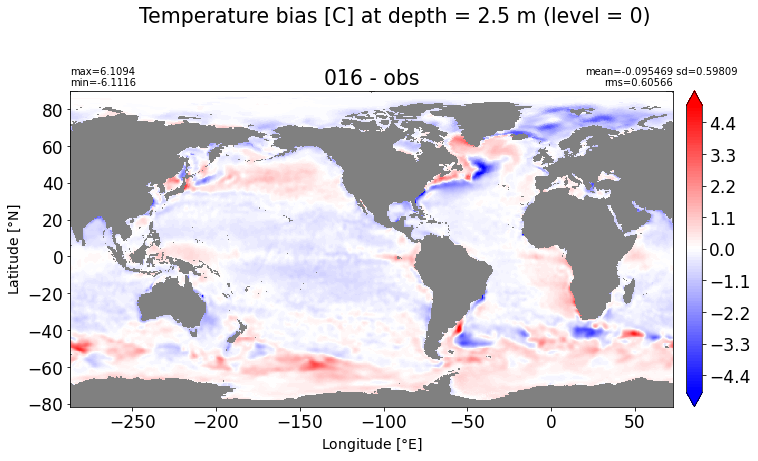

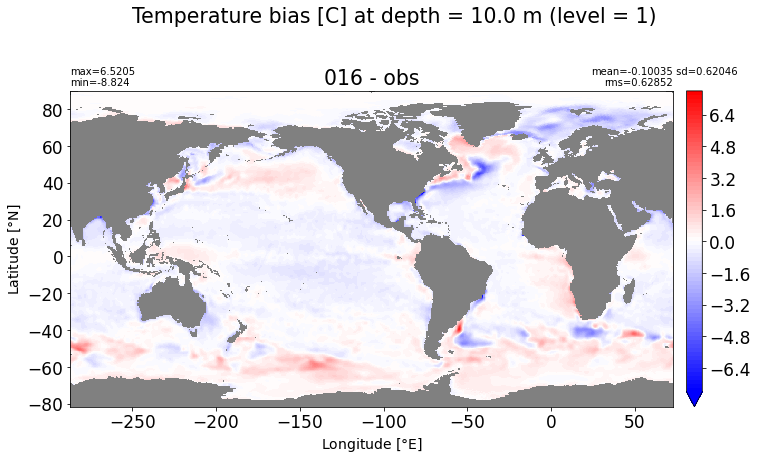

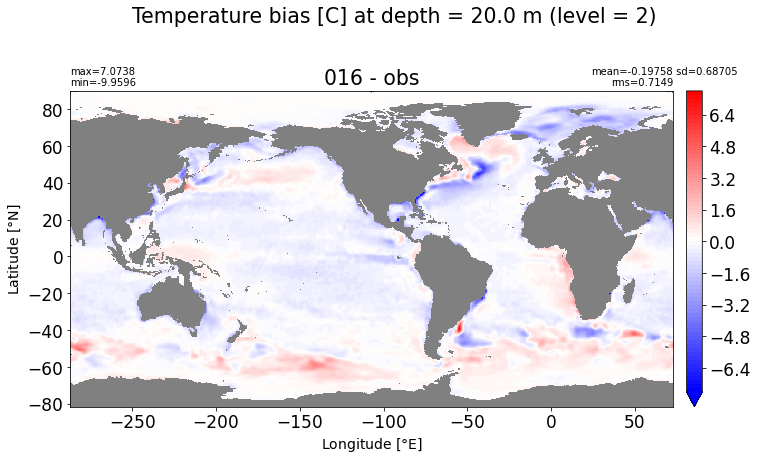

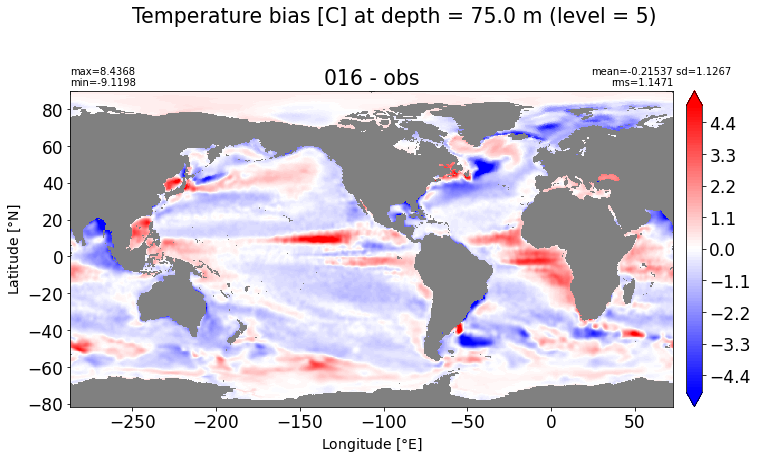

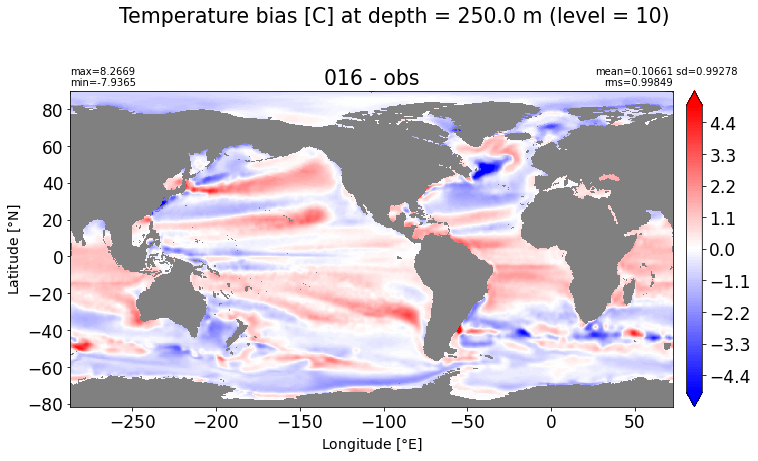

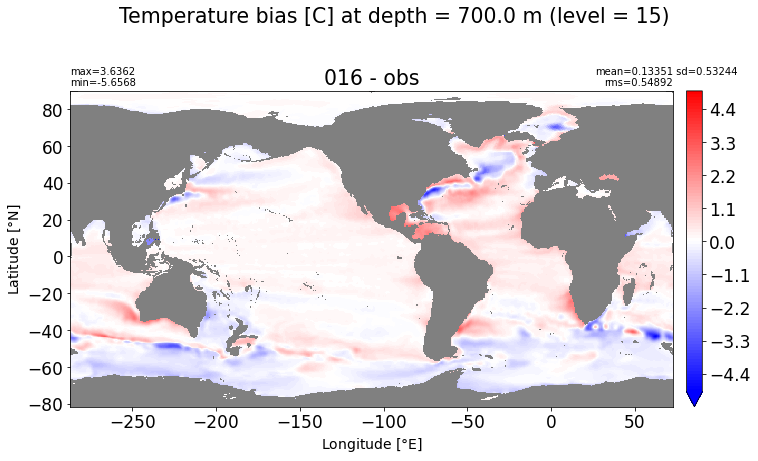

In [6]:
# change k indice to see bias at other depths
levels=[0,1,2,5,10,15,20,25]
tlim=[5,7.5,7.5,5,5,5]

for k,t in zip(levels,tlim):
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom_t = xr.open_dataset(path+case+'_thetao_time_mean.nc')
    if 'area_t' in dir(grd[i]):
      area = grd[i].area_t
    else:
      area = grd[i].areacello
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6.5))
    temp_mom = np.ma.masked_invalid(ds_mom_t.thetao_bias[k,:].values)
  
    plt.suptitle('Temperature bias [C] at depth = {} m (level = {})'.format(ds_mom_t.z_l[k].values, k))
    xyplot(temp_mom, grd[i].geolon, grd[i].geolat, area, title=str(label[i]+' - obs'), axis=ax, 
         clim=(-t,t), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
    plt.subplots_adjust(top = 0.8)

#### Salinity

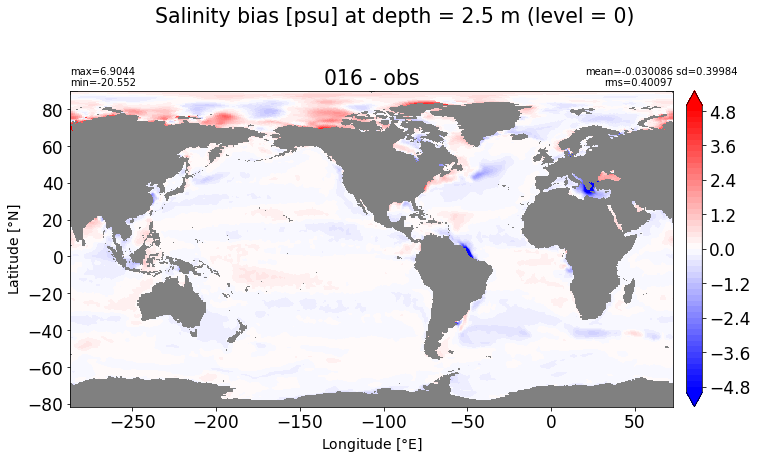

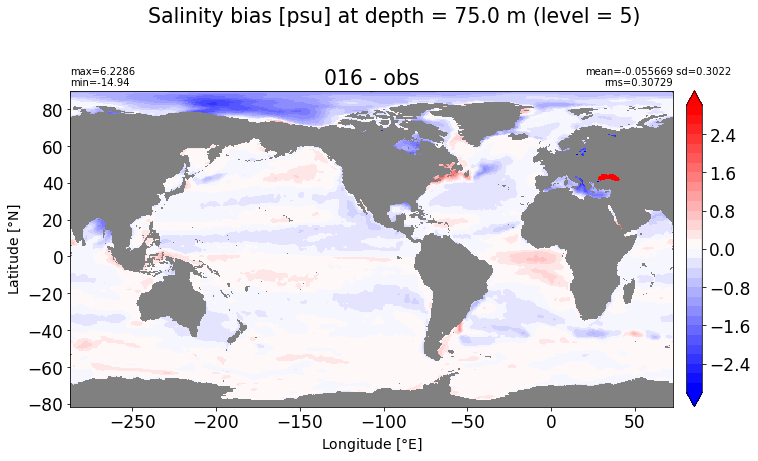

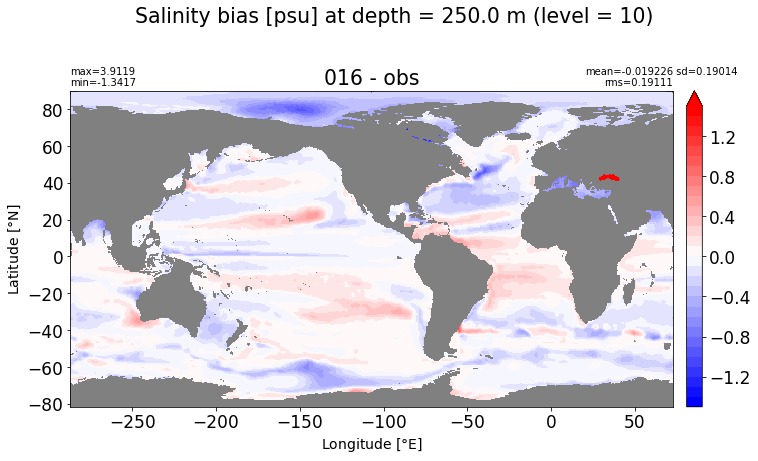

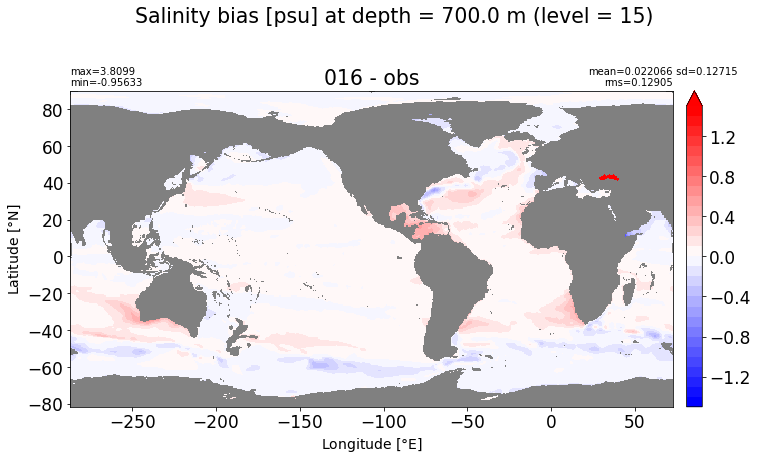

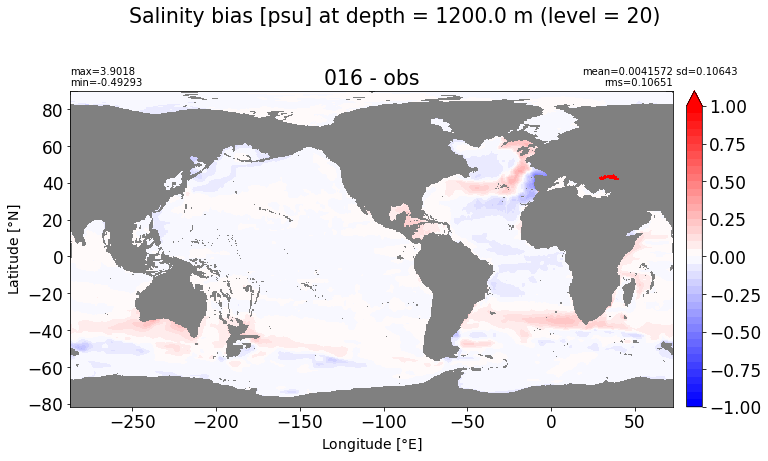

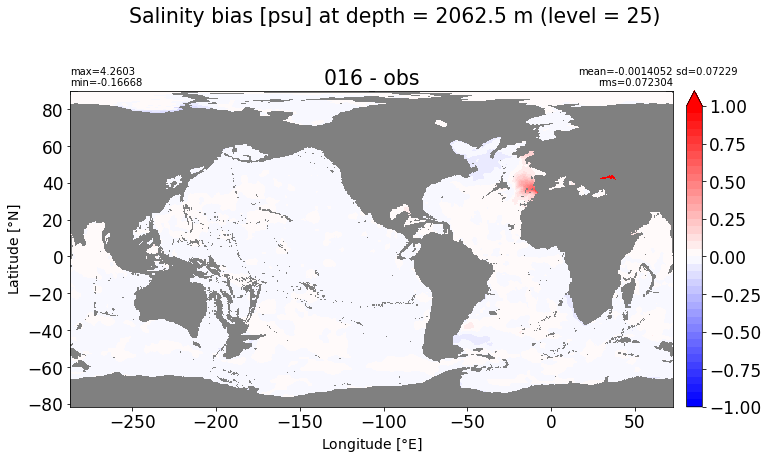

In [7]:
# change k indice to see bias at other depths
levels=[0,5,10,15,20,25]

slim=[5,3,1.5,1.5,1,1]

for k,s in zip(levels,slim):
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    if 'area_t' in dir(grd[i]):
      area = grd[i].area_t
    else:
      area = grd[i].areacello
    
    ds_mom_s = xr.open_dataset(path+case+'_so_time_mean.nc')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6.5))
    salt_mom = np.ma.masked_invalid(ds_mom_s.so_bias[k,:].values)
    
    plt.suptitle('Salinity bias [psu] at depth = {} m (level = {})'.format(ds_mom_s.z_l[k].values, k))
    xyplot(salt_mom, grd[i].geolon, grd[i].geolat, area, title=str(label[i]+' - obs'), axis=ax, 
         clim=(-s,s), nbins=50, colormap=plt.cm.bwr, centerlabels=True)
    plt.subplots_adjust(top = 0.8)

### T/S bias zonal means

#### Potential temperature

Global 0


MedSea 1
Arctic 2


PacificOcean 3
AtlanticOcean 4


IndianOcean 5
SouthernOcean 6


LabSea 7


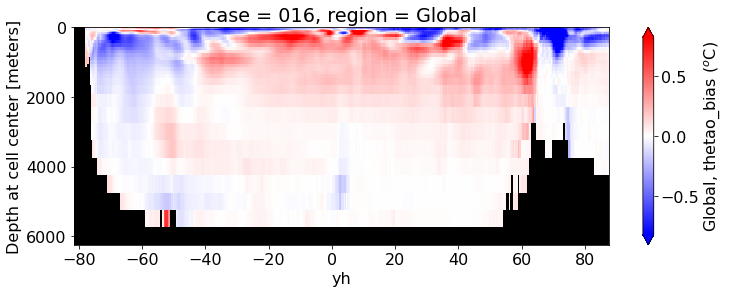

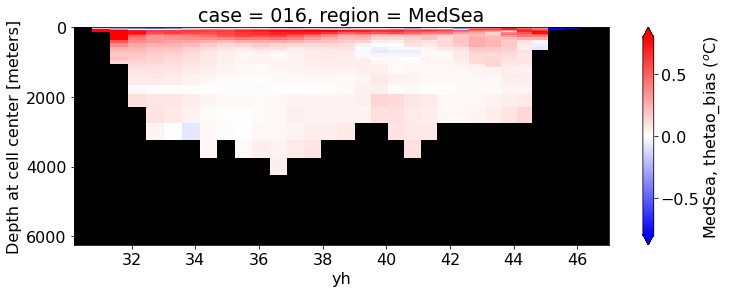

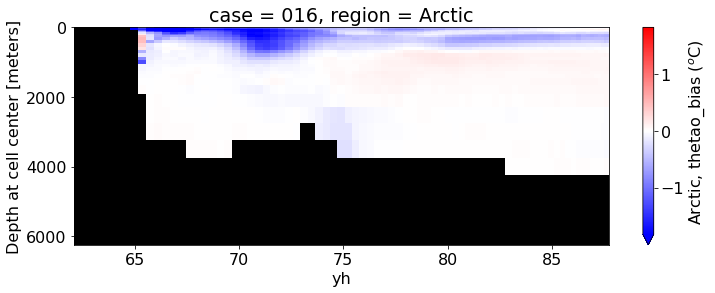

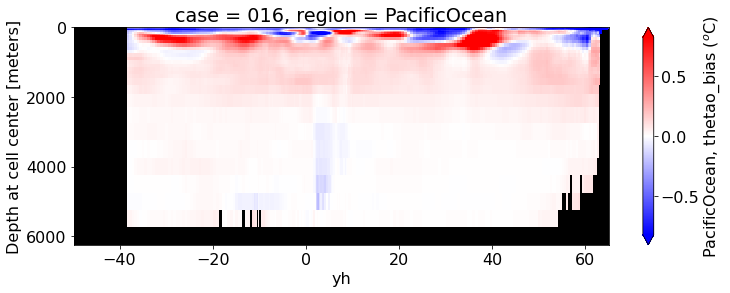

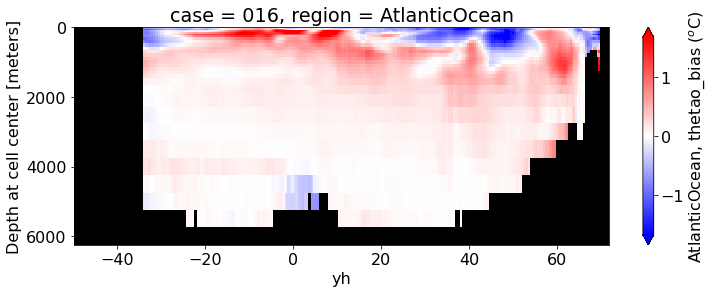

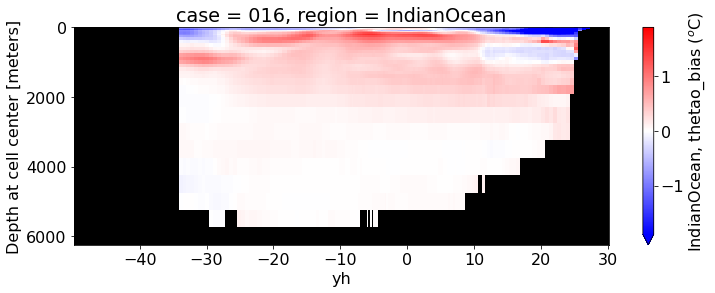

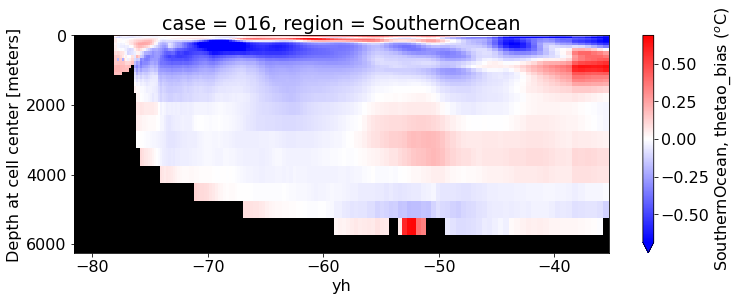

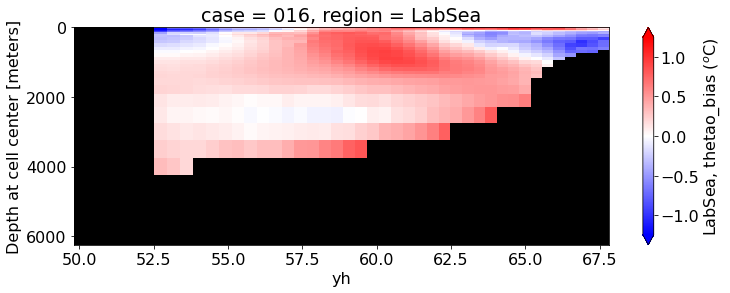

In [8]:
reg = "AtlanticOcean"
var = 'thetao_bias'
units = r'$^o$C'
regions = ['Global','MedSea','Arctic','PacificOcean',
           'AtlanticOcean','IndianOcean','SouthernOcean',
          'LabSea']
ylim_min = [-90, 30, 62, -50, -50, -50, -90, 50]
ylim_max = [ 90, 47, 90,  65,  72,  30, -35, 68 ]

cmap = plt.get_cmap('bwr')  
cmap.set_bad(color='black')  
matplotlib.rcParams.update({'font.size': 16})

for reg, j in zip(regions, range(len(regions))):
  print(reg, j)
  da  = []
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom_t = xr.open_dataset(path+case+'_thetao_time_mean.nc')
    atl = basin_code[i].sel(region=reg)
    # Set zero values to NaN
    atl = atl.where(atl != 0, np.nan)
    da.append((ds_mom_t[var] * atl).mean('xh').expand_dims(case=[label[i]]).sel(yh=slice(ylim_min[j], ylim_max[j])))

  combined_da = xr.concat(da, dim="case")
  col = None
  if len(combined_da) > 1:
      col = "case"
  g = combined_da.plot(x="yh", y="z_l", col=col, 
                 yincrease=False, col_wrap=2,
                figsize=(12,4), cmap=cmap, robust=True,
                cbar_kwargs={"label": reg + ', ' + var + ' ({})'.format(units)})

#### Salinity

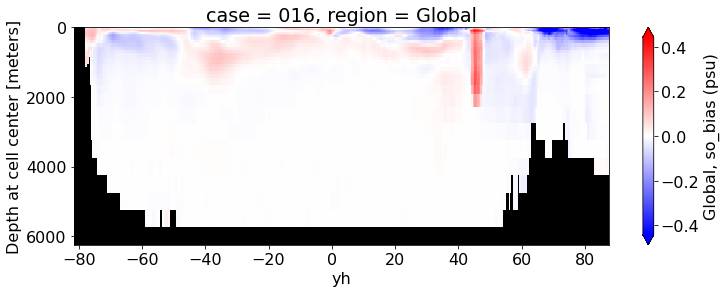

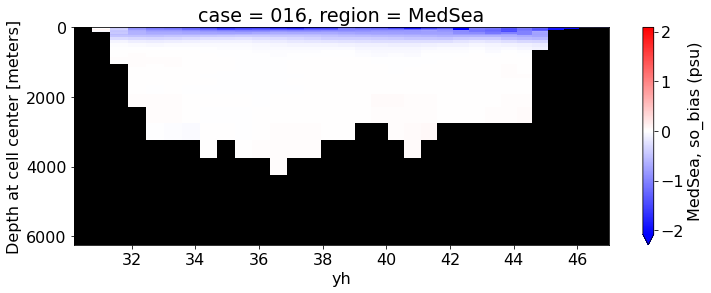

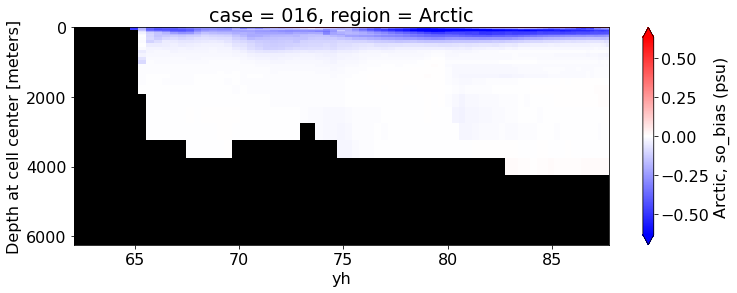

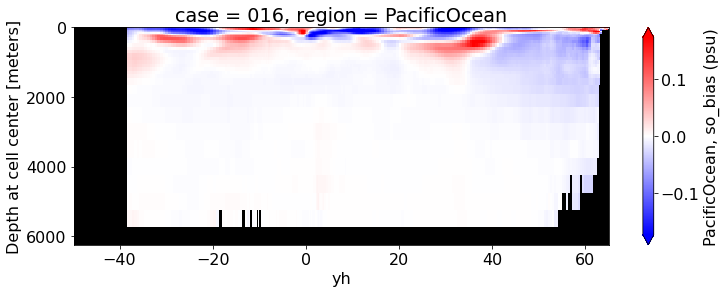

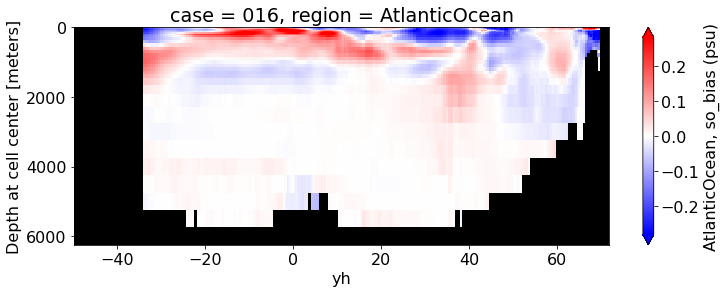

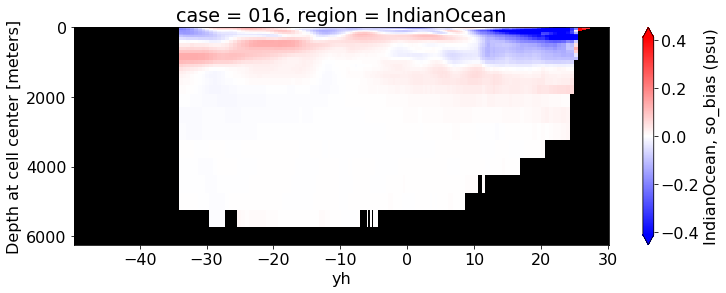

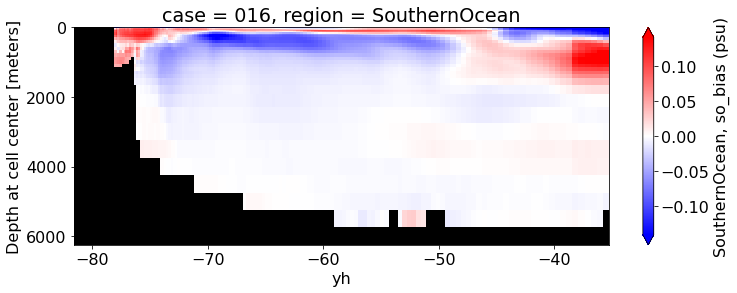

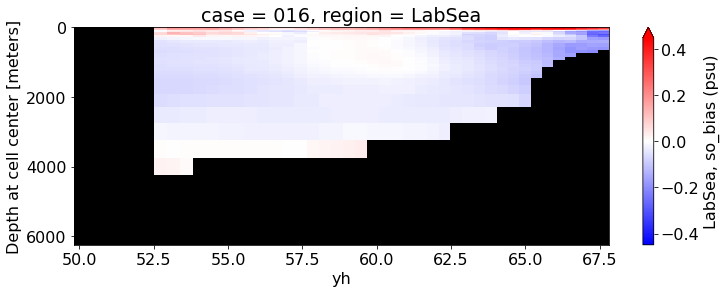

In [9]:
reg = "AtlanticOcean"
var = 'so_bias'
units = 'psu'
regions = ['Global','MedSea','Arctic','PacificOcean',
           'AtlanticOcean','IndianOcean','SouthernOcean',
          'LabSea']
cmap = plt.get_cmap('bwr')  
cmap.set_bad(color='black')  
matplotlib.rcParams.update({'font.size': 16})

for reg, j in zip(regions, range(len(regions))):
  #print(reg)
  da  = []
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom_t = xr.open_dataset(path+case+'_so_time_mean.nc')
    atl = basin_code[i].sel(region=reg)
    # Set zero values to NaN
    atl = atl.where(atl != 0, np.nan)
    da.append((ds_mom_t[var] * atl).mean('xh').expand_dims(case=[label[i]]).sel(yh=slice(ylim_min[j], ylim_max[j])))

  combined_da = xr.concat(da, dim="case")
  col = None
  if len(combined_da) > 1:
      col = "case"
  g = combined_da.plot(x="yh", y="z_l", col=col, 
                 yincrease=False, col_wrap=2,
                figsize=(12,4), cmap=cmap, robust=True,
                cbar_kwargs={"label": reg + ', ' + var + ' ({})'.format(units)})

### T/S bias meridional means
#### Potential temperature

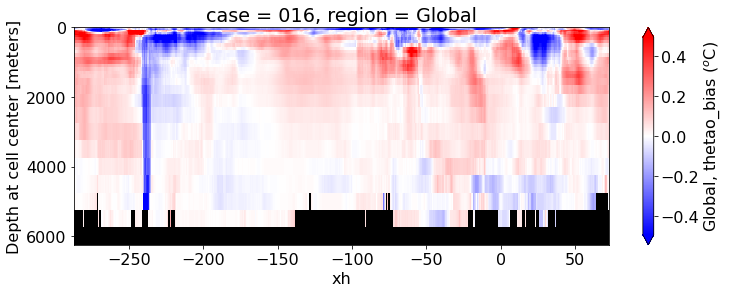

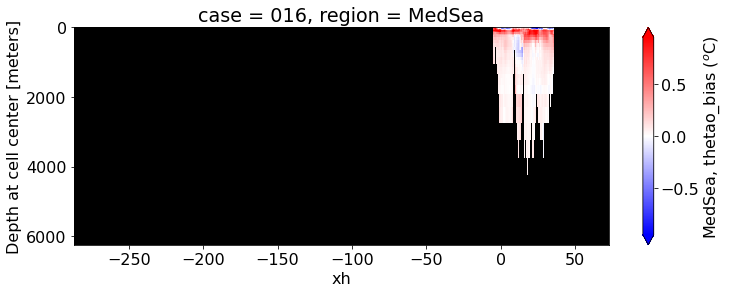

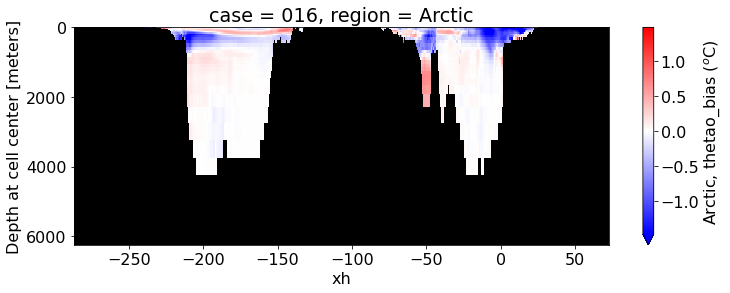

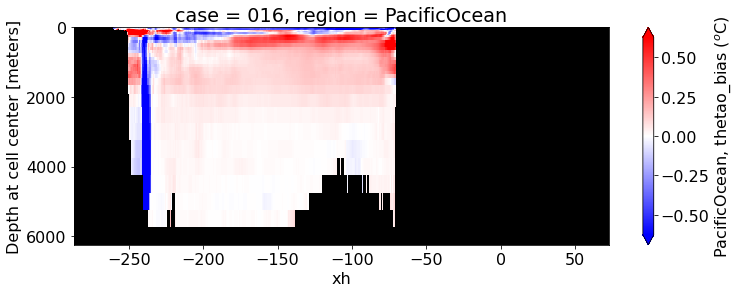

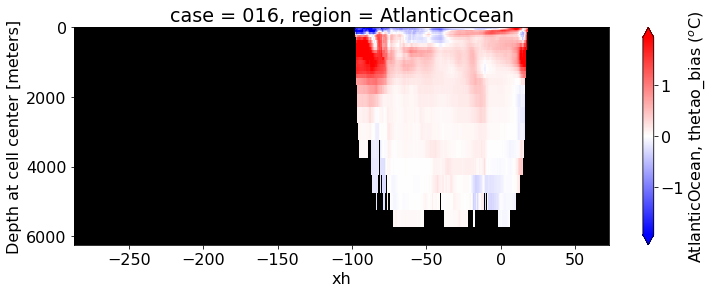

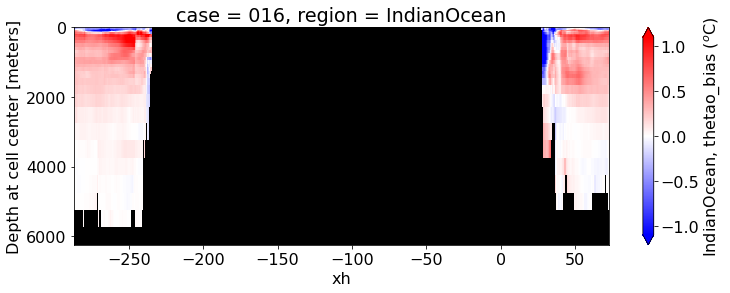

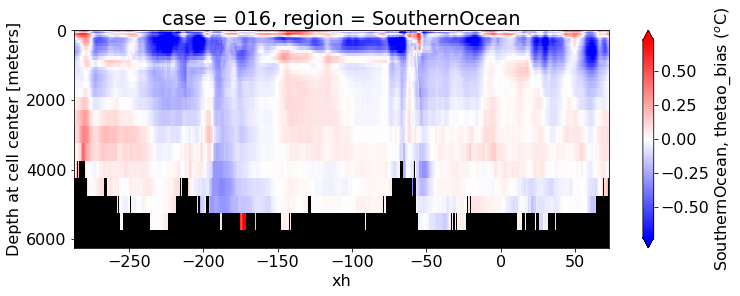

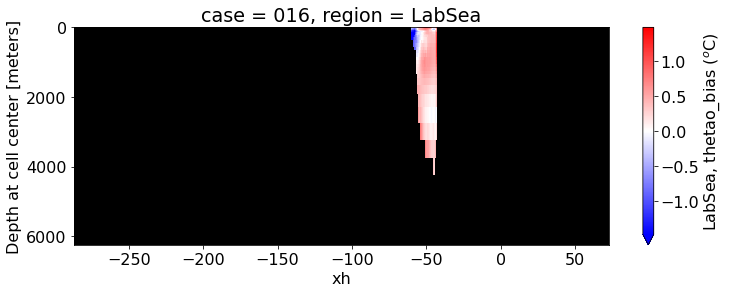

In [10]:
reg = "AtlanticOcean"
var = 'thetao_bias'
units = r'$^o$C'
regions = ['Global','MedSea','Arctic','PacificOcean',
           'AtlanticOcean','IndianOcean','SouthernOcean',
          'LabSea']
cmap = plt.get_cmap('bwr')  
cmap.set_bad(color='black')  
matplotlib.rcParams.update({'font.size': 16})

for reg in regions:
  #print(reg)
  da  = []
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom_t = xr.open_dataset(path+case+'_thetao_time_mean.nc')
    atl = basin_code[i].sel(region=reg)
    # Set zero values to NaN
    atl = atl.where(atl != 0, np.nan)
    da.append((ds_mom_t[var] * atl).mean('yh').expand_dims(case=[label[i]]))

  combined_da = xr.concat(da, dim="case")
  col = None
  if len(combined_da) > 1:
      col = "case"
  g = combined_da.plot(x="xh", y="z_l", col=col, 
                 yincrease=False, col_wrap=2,
                figsize=(12,4), cmap=cmap, robust=True,
                cbar_kwargs={"label": reg + ', ' + var + ' ({})'.format(units)})

#### Salinity

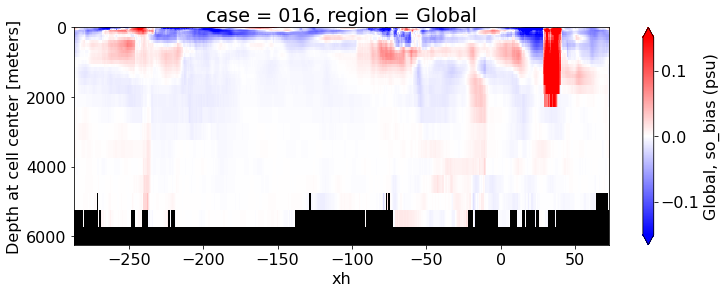

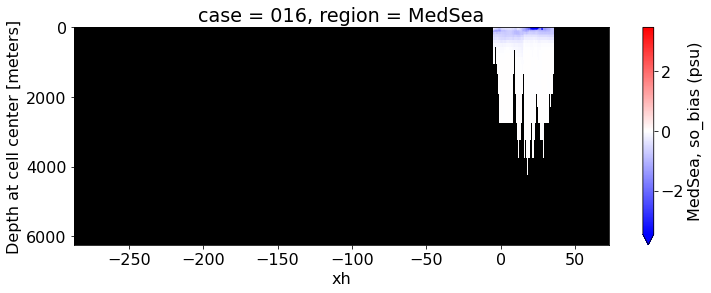

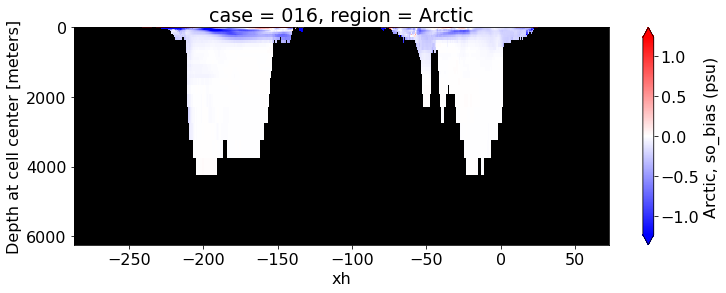

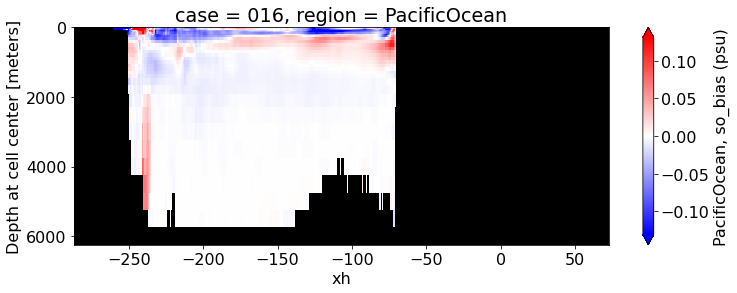

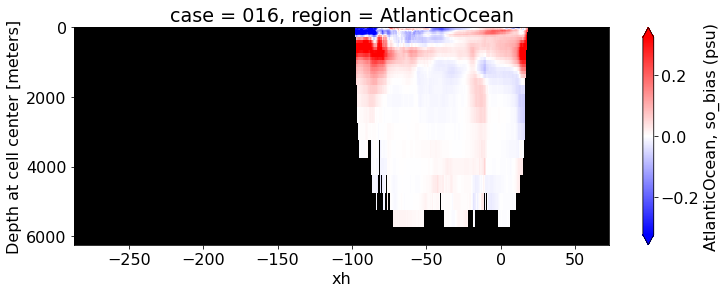

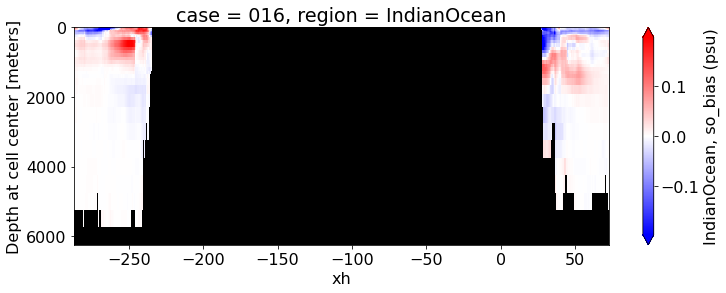

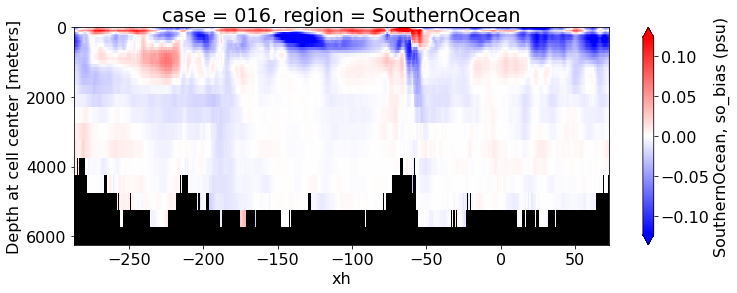

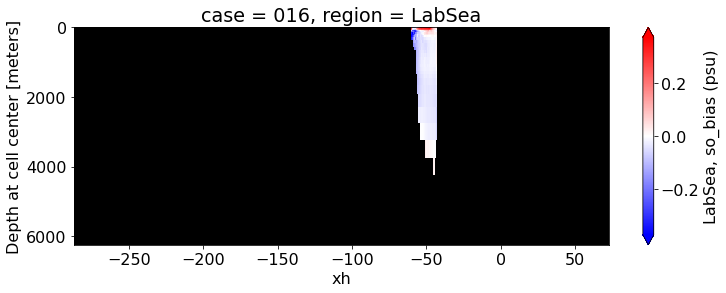

In [11]:
reg = "AtlanticOcean"
var = 'so_bias'
units = 'psu'
regions = ['Global','MedSea','Arctic','PacificOcean',
           'AtlanticOcean','IndianOcean','SouthernOcean',
          'LabSea']
cmap = plt.get_cmap('bwr')  
cmap.set_bad(color='black')  
matplotlib.rcParams.update({'font.size': 16})

for reg in regions:
  #print(reg)
  da  = []
  for path, case, i in zip(ocn_path, casename, range(len(casename))):
    ds_mom_t = xr.open_dataset(path+case+'_so_time_mean.nc')
    atl = basin_code[i].sel(region=reg)
    # Set zero values to NaN
    atl = atl.where(atl != 0, np.nan)
    da.append((ds_mom_t[var] * atl).mean('yh').expand_dims(case=[label[i]]))

  combined_da = xr.concat(da, dim="case")
  col = None
  if len(combined_da) > 1:
      col = "case"
  g = combined_da.plot(x="xh", y="z_l", col=col, 
                 yincrease=False, col_wrap=2,
                figsize=(12,4), cmap=cmap, robust=True,
                cbar_kwargs={"label": reg + ', ' + var + ' ({})'.format(units)})